<a href="https://colab.research.google.com/github/nelslindahlx/KnowledgeReduce/blob/main/CivicHonorsAdvancedKG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Civic Honors Advanced Knoweldge Graph

The revised code, designed for execution in Google Colab, presents an advanced approach to extracting and visualizing knowledge from a webpage. It incorporates more sophisticated Natural Language Processing (NLP) techniques and an enhanced visualization of the resulting knowledge graph. The process is organized into distinct steps:

1. **Installing Packages**: The code begins by installing necessary Python libraries, including `requests` for web requests, `bs4` (Beautiful Soup) for HTML parsing, `spacy` for advanced NLP, and `networkx` with `matplotlib` for graph creation and visualization.

2. **Importing Libraries**: After installation, the code imports these libraries for use.

3. **Fetching Webpage Content**: The `fetch_webpage_content` function retrieves the HTML content from the specified URL, "https://civichonors.com/", using the `requests` library.

4. **Extracting Text from HTML**: The `extract_text_from_html` function parses the HTML content to extract relevant textual data, removing unnecessary elements like scripts and styles using Beautiful Soup.

5. **Advanced Knowledge Mapping**:
    - The `advanced_map_knowledge` function leverages `spacy` for more sophisticated NLP tasks. It not only identifies entities in the text but also captures their types and dependency relations.
    - This enhanced mapping provides a deeper understanding of the textual content, recognizing not just entities but how they are contextually related.

6. **Creating an Advanced Knowledge Graph**:
    - The `create_advanced_knowledge_graph` function constructs a knowledge graph using `networkx`.
    - Unlike the simpler version, this graph includes nodes for entities and their relations, and edges represent the dependencies between these entities, reflecting the complex structure of the text.

7. **Enhanced Visualization**:
    - The `enhanced_visualize_knowledge_graph` function significantly improves the visualization of the knowledge graph.
    - It employs `matplotlib` and `networkx` to visually represent the nodes and their interconnections with distinct styles and colors, enhancing the interpretability of the graph.
    - This visualization helps in better understanding the complex relationships and hierarchies present in the text.

By sequentially running these steps in a Google Colab notebook, the code effectively processes web content to extract and visually represent a rich network of knowledge. The advanced NLP techniques provide a more nuanced extraction of entities and their relationships, while the enhanced visualization offers a clearer and more detailed depiction of this complex information. This approach is particularly useful for in-depth text analysis and knowledge discovery from web sources.

# Step 1: Install Necessary Packages

In [1]:
!pip install requests bs4 spacy networkx matplotlib
!python -m spacy download en_core_web_sm

  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=6011f7d5836e0f5aa247b9b88ec9fd2fce01c84b1df3eaa360d5d38bd815e189
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4
2023-12-15 18:20:54.292689: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-15 18:20:54.292782: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-15 18:20:54.295568: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-15 18:20:54.308424: I tensorflow/core/platf

# Step 2: Import Libraries and Define Functions

Import Libraries

In [2]:
import requests
from bs4 import BeautifulSoup
import spacy
import networkx as nx
import matplotlib.pyplot as plt

Fetch Webpage Content

In [3]:
def fetch_webpage_content(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.text
    else:
        return None

webpage_content = fetch_webpage_content('https://civichonors.com/')

Extract Relevant Content

In [4]:
def extract_text_from_html(html_content):
    soup = BeautifulSoup(html_content, 'html.parser')
    for script_or_style in soup(['script', 'style']):
        script_or_style.extract()
    text = soup.get_text()
    return text

extracted_text = extract_text_from_html(webpage_content)

Advanced Knowledge Mapping

In [5]:
nlp = spacy.load("en_core_web_sm")

def advanced_map_knowledge(text):
    doc = nlp(text)
    knowledge_map = []
    for token in doc:
        if token.ent_type_:
            knowledge_map.append((token.text, token.ent_type_, token.dep_))
    return knowledge_map

advanced_knowledge_map = advanced_map_knowledge(extracted_text)

Create Advanced Knowledge Graph

In [6]:
def create_advanced_knowledge_graph(knowledge_map):
    knowledge_graph = nx.Graph()

    for entity, label, relation in knowledge_map:
        knowledge_graph.add_node(entity, label=label)
        if relation != "ROOT":
            knowledge_graph.add_edge(entity, relation)

    return knowledge_graph

advanced_knowledge_graph = create_advanced_knowledge_graph(advanced_knowledge_map)

Enhanced Visualization

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


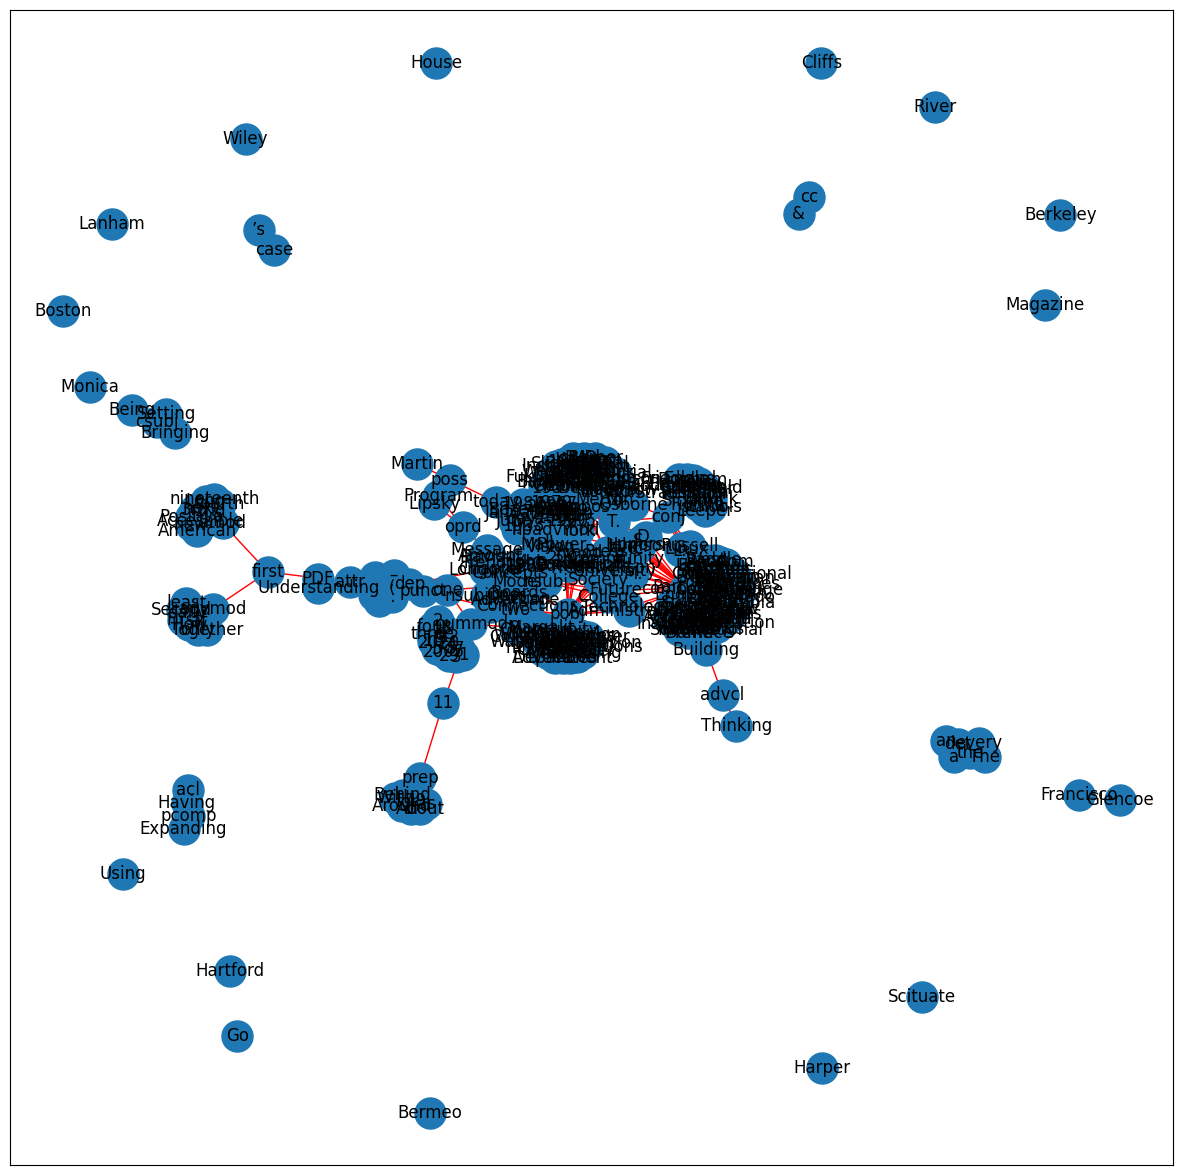

In [7]:
def enhanced_visualize_knowledge_graph(knowledge_graph):
    plt.figure(figsize=(15, 15))
    pos = nx.spring_layout(knowledge_graph)  # Use spring layout for better node distribution

    nx.draw_networkx_nodes(knowledge_graph, pos, cmap=plt.get_cmap('jet'), node_size=500)
    nx.draw_networkx_labels(knowledge_graph, pos)
    nx.draw_networkx_edges(knowledge_graph, pos, edge_color='r', arrows=True)

    plt.show()

enhanced_visualize_knowledge_graph(advanced_knowledge_graph)